In [4]:
import numpy as np
import pandas as pd
from IPython.display import display

In [5]:
df = pd.read_csv('df_all_apt(2022-02-12).csv')
df.head()

,property_ID,address_ID,listed_date,reupload,new,descrip10,description,Floorsize,Floor,House_type,...,WFH0516,WFH,g_renovated,g_view,g_unit,g_virtual,g_location,g_apt,g_activity,phase_num
0,1,1,2019-10-26,new,1,excellent unit sale miss 2 bed rom sale go fast,excellent unit sale miss 2 bed rom sale go fas...,930,Middle Floor,Condo,...,0,0,0,1,0,0,1,0,1,1.0
1,2,2,2019-10-26,new,1,great deal miss rarely avail 3 bed sale go fast,great deal miss rarely avail 3 bed sale go fas...,1143,Middle Floor,Condo,...,0,0,0,1,0,0,1,0,0,1.0
2,3,3,2019-10-26,new,1,canopy exe condo available single spr 21 years...,canopy exe condo available single spr 21 years...,1033,High Floor,Condo,...,0,0,0,1,1,0,0,1,1,1.0
3,4,4,2019-10-26,new,1,big 2 bedrooms sale sale want stay high floor ...,big 2 bedrooms sale sale want stay high floor ...,1001,High Floor,Condo,...,0,0,0,1,0,0,0,0,0,1.0
4,5,2,2019-10-26,new,1,3br awesome full reservoir view rare full unbl...,3br awesome full reservoir view rare full unbl...,1248,High Floor,Condo,...,0,0,0,1,1,0,0,0,0,1.0


In [ ]:
df = df.loc[df['House_type'] == 'Condo'].reset_index(drop = True)
df['price'] = df['price'] / 1000
df['price_log'] = np.log(df['price'])

## DID 모델링

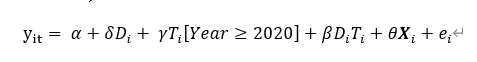

- y : 단위면적당 가격
- D_i : 처리그룹에 속하면 1,대조그룹에 속하면 0을 갖는 더미변수
- T_i: listed_year≥2020이면 1,listed_year=2019면 0을 갖는 더미변수
- D_i T_i: 두 더미변수의 곱으로 만들어진 상호작용변수
- X_(i ):각 패널의 특성벡터(면적,방수,화장실 갯수 등 처리더미변수와는 다르지만 각 주택특성의 특성을 통제하는 변수들 )

In [ ]:
import statsmodels.formula.api as smf

# defining variable
#variable = list(df.columns[df.columns.str.contains('keyword_')])
variable = list(df.columns[df.columns.str.contains('g_')])

# time variable
times = ['listed_year_dummy', 'T_a1','T_a1.5', 'T_a2', 'T_a3', 'T_a4', 'T_a5', 'T_a6', 'T_a7', 'T_a10', 'T_a11']

for time in times:
    # initiate dictionary
    coef = {}
    for var in variable:
        df['d'] = df[var].astype('int') # Di
        df['t'] = df[time].astype('int') # t=Ti
        df['dt'] = df['d'] * df['t'] # Di * Ti
        
        # formula = y ~ Di + Ti + Di*Ti  +Xi
        model = 'price_log ~ d + t + dt + Floorsize + rooms +years_from_TOP'
        
        # fitting
        mod = smf.ols(formula=model, data = df)
        res = mod.fit()
        #print(str(time)+' , '+str(var)+ "의 분석 결과\n")
        #print(res.summary())
        #print()
        
        # save the result
        coef[var] = [round(res.params['dt'], 5), round(res.pvalues['dt'], 3)]
        
    # print the table
    print('time: ', str(time))
    display(pd.DataFrame(coef).rename(index = {0 : 'coef', 1 : 'pvalue'}).transpose().sort_values(by = 'pvalue'))
    print()

## Non log

In [14]:
pd.DataFrame(df[['g_renovated', 'g_view', 'g_unit', 'g_virtual', 'g_location', 'g_apt', 'g_activity']].apply(lambda x : sum(x) / df.shape[0] * 100))

,0
g_renovated,16.431780
g_view,32.639369
g_unit,25.454424
g_virtual,2.084392
g_location,43.138007
g_apt,1.969797
g_activity,6.605716


In [23]:
print(df.loc[df['keyword_sum'] == 0].shape[0] / df.shape[0] * 100)

23.19001225132723


In [18]:
df['keyword_sum'] = df[['g_renovated', 'g_view', 'g_unit', 'g_virtual', 'g_location', 'g_apt', 'g_activity']].apply(lambda x : sum(x), axis = 1)
df.loc[df['keyword_sum'] == 0].sum()

KeyboardInterrupt: 

In [8]:
times = ['listed_year_dummy', 'WFH', 'WFH0516']
variable = list(df.columns[df.columns.str.contains('g_')])
regions = ['central', 'region_code', 'plan_area_code']

for time in times:
    for var in variable:
        print('reg price '+ 'i.' + var + '##' + time + ' floorsize years_from_top rooms free i.floor_code')

reg price i.g_renovated##listed_year_dummy floorsize years_from_top rooms free i.floor_code
reg price i.g_view##listed_year_dummy floorsize years_from_top rooms free i.floor_code
reg price i.g_unit##listed_year_dummy floorsize years_from_top rooms free i.floor_code
reg price i.g_virtual##listed_year_dummy floorsize years_from_top rooms free i.floor_code
reg price i.g_location##listed_year_dummy floorsize years_from_top rooms free i.floor_code
reg price i.g_apt##listed_year_dummy floorsize years_from_top rooms free i.floor_code
reg price i.g_activity##listed_year_dummy floorsize years_from_top rooms free i.floor_code
reg price i.g_renovated##WFH floorsize years_from_top rooms free i.floor_code
reg price i.g_view##WFH floorsize years_from_top rooms free i.floor_code
reg price i.g_unit##WFH floorsize years_from_top rooms free i.floor_code
reg price i.g_virtual##WFH floorsize years_from_top rooms free i.floor_code
reg price i.g_location##WFH floorsize years_from_top rooms free i.floor_code

In [ ]:
for region in regions:
    for var in variable:
        print('reg price '+ 'i.' + var + '##' + 'i.'+ region + ' floorsize years_from_top rooms free i.floor_code' + ', vce(cluster '+region+')')

In [ ]:
for region in regions:
    for time in times:
        for varb in variable:
            print('reg price '+ 'i.' + var + '##' + 'i.'+region + '##' + time + ' floorsize years_from_top rooms free i.floor_code' + ', vce(cluster '+region+')')

## log

In [ ]:
times = ['listed_year_dummy', 'T_a1','T_a1.5', 'T_a2', 'T_a3', 'T_a4', 'T_a5', 'T_a6', 'T_a7', 'T_a10', 'T_a11']
variable = list(df.columns[df.columns.str.contains('g_')])
regions = ['central', 'region_code', 'pla_area_code']

for time in times:
    for var in variable:
        print('reg log_price '+ 'i.' + var + '##' + time + ' floorsize years_from_top rooms free i.floor_code')

In [ ]:
for region in regions:
    for var in variable:
        print('reg log_price '+ 'i.' + var + '##' + 'i.'+ region + ' floorsize years_from_top rooms free i.floor_code' + ', vce(cluster '+region+')')

In [ ]:
for region in regions:
    for time in times:
        for var in variable:
            print('reg log_price '+ 'i.' + var + '##' + 'i.'+region + '##' + time + ' floorsize years_from_top rooms free i.floor_code' + ', vce(cluster '+region+')')